# Table of Contents
[Step 1: Establish a Dataframe](#a1)<br>
    [Step 1: Solution](#a1s)<br>
[Step 2: Keep index and columns](#a2)<br>
    [Assignment 2: Solution](#a2s)<br>
[Step 3: Perform data cleaning](#a3)<br>
    [Step 3: Solution](#a3s)<br>
[Step 4: Calculate regression line and plot result](#a4)<br>
    [Step 4: Solution](#a4s)<br>

#### <u>Step 1: Establish a Dataframe</u> <a id="a1"></a>
Start Jupyter Notebook and make a new notebook: LinearRegMissingData
Import needed libraries:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
```

Establish training set as a dataframe:

```python
clickData = {'CostPerClick': [2.3, 2.1, 2.5, 4.5, 5.9, 4.1, 8.9],
 'TotalClicksPerDay': [89.0,63.0,71.0,np.NaN,80.0,89.0,150.0]}
trainingSet = pd.DataFrame(clickData)
trainingSet
```

#### <u>Step 1: Solution</u> <a id="a1s"></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [34]:
clickData = {'CostPerClick': [2.3, 2.1, 2.5, 4.5, 5.9, 4.1, 8.9],
             'TotalClicksPerDay': [89.0,63.0,71.0,np.NaN,80.0,89.0,150.0]}
trainingSet = pd.DataFrame(clickData)
trainingSet

,CostPerClick,TotalClicksPerDay
0,2.3,89.0
1,2.1,63.0
2,2.5,71.0
3,4.5,NaN
4,5.9,80.0
5,4.1,89.0
6,8.9,150.0


#### <u>Step 2: Keep index and columns</u> <a id="a2"></a>
Keep index:

```python
keptIndex=trainingSet.index
keptIndex
```

Keep columns:
```python
keptColumns=trainingSet.columns
keptColumns
```

#### <u>Step 2: Solution</u> <a id="a2s"></a>

In [35]:
keptIndex=trainingSet.index
keptIndex

RangeIndex(start=0, stop=7, step=1)

In [36]:
keptColumns=trainingSet.columns
keptColumns

Index(['CostPerClick', 'TotalClicksPerDay'], dtype='object')

#### <u>Step 3: Perform data cleaning</u> <a id="a3"></a>
Create simple imputer in order to clean data:
```python
#Missing import of SimpleImputer, find out your self

imputer = SimpleImputer(strategy="median")
imputer.fit(trainingSet)
cleanedData=imputer.transform(trainingSet)
cleanedData
```

Note what happened!

Establish cleaned dataset as a Dataframe:

```python
trainingSetCleaned=pd.DataFrame(cleanedData,columns=keptColumns,
index=keptIndex)
trainingSetCleaned
```

#### <u>Step 3: Solution</u> <a id="a3s"></a>

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(trainingSet)
cleanedData=imputer.transform(trainingSet)
cleanedData

array([[  2.3,  89. ],
       [  2.1,  63. ],
       [  2.5,  71. ],
       [  4.5,  84.5],
       [  5.9,  80. ],
       [  4.1,  89. ],
       [  8.9, 150. ]])

In [38]:
trainingSetCleaned=pd.DataFrame(cleanedData,columns=keptColumns,index=keptIndex)
trainingSetCleaned

,CostPerClick,TotalClicksPerDay
0,2.3,89.0
1,2.1,63.0
2,2.5,71.0
3,4.5,84.5
4,5.9,80.0
5,4.1,89.0
6,8.9,150.0


#### <u>Step 4: Calculate regression line and plot result</u> <a id="a4"></a>
ReUse previous code from Simple dataframe & linear regression exercise

***Congratulations.***

#### <u>Step 4: Solution</u> <a id="a4s"></a>

In [39]:
clickLabels = np.c_[trainingSetCleaned["TotalClicksPerDay"]]
clickFeatures = np.c_[trainingSetCleaned["CostPerClick"]]

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(clickFeatures, clickLabels)

LinearRegression()

In [41]:
intersection=lin_reg.intercept_[0]
slope=lin_reg.coef_[0][0]

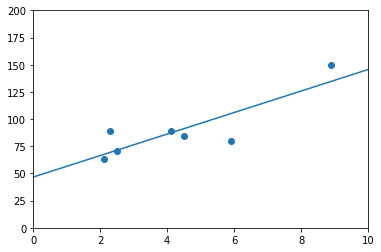

In [42]:
plt.axis([0, 10, 0, 200])
plt.scatter(clickFeatures, clickLabels)
intersection=lin_reg.intercept_[0]
slope=lin_reg.coef_[0]
test_line = [(slope*item + intersection) for item in [0, 10]]
plt.plot([0, 10], test_line)